<a href="https://colab.research.google.com/github/yy1200/COVID-19/blob/main/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import pandas as pd
import numpy as np

#df = pd.read_csv("/content/covid-variants.csv",index_col='date',infer_datetime_format=True)
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d 'yamqwe/omicron-covid19-variant-daily-cases'

  0% 0.00/432k [00:00<?, ?B/s]
100% 432k/432k [00:00<00:00, 29.3MB/s]


In [3]:
! mkdir omicron-covid19
! unzip omicron-covid19-variant-daily-cases.zip -d omicron-covid19

Archive:  omicron-covid19-variant-daily-cases.zip
  inflating: omicron-covid19/covid-variants.csv  


In [4]:
df = pd.read_csv('omicron-covid19/covid-variants.csv')
df

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3
...,...,...,...,...,...,...
100411,Zimbabwe,2021-11-01,Omicron,0,0.0,6
100412,Zimbabwe,2021-11-01,S:677H.Robin1,0,0.0,6
100413,Zimbabwe,2021-11-01,S:677P.Pelican,0,0.0,6
100414,Zimbabwe,2021-11-01,others,0,0.0,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   location             100416 non-null  object 
 1   date                 100416 non-null  object 
 2   variant              100416 non-null  object 
 3   num_sequences        100416 non-null  int64  
 4   perc_sequences       100416 non-null  float64
 5   num_sequences_total  100416 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


In [6]:
df.describe()

,num_sequences,perc_sequences,num_sequences_total
count,100416.000000,100416.000000,100416.000000
mean,72.171676,6.154355,1509.582457
std,1669.262169,21.898989,8445.291772
min,0.000000,-0.010000,1.000000
25%,0.000000,0.000000,12.000000
50%,0.000000,0.000000,59.000000
75%,0.000000,0.000000,394.000000
max,142280.000000,100.000000,146170.000000


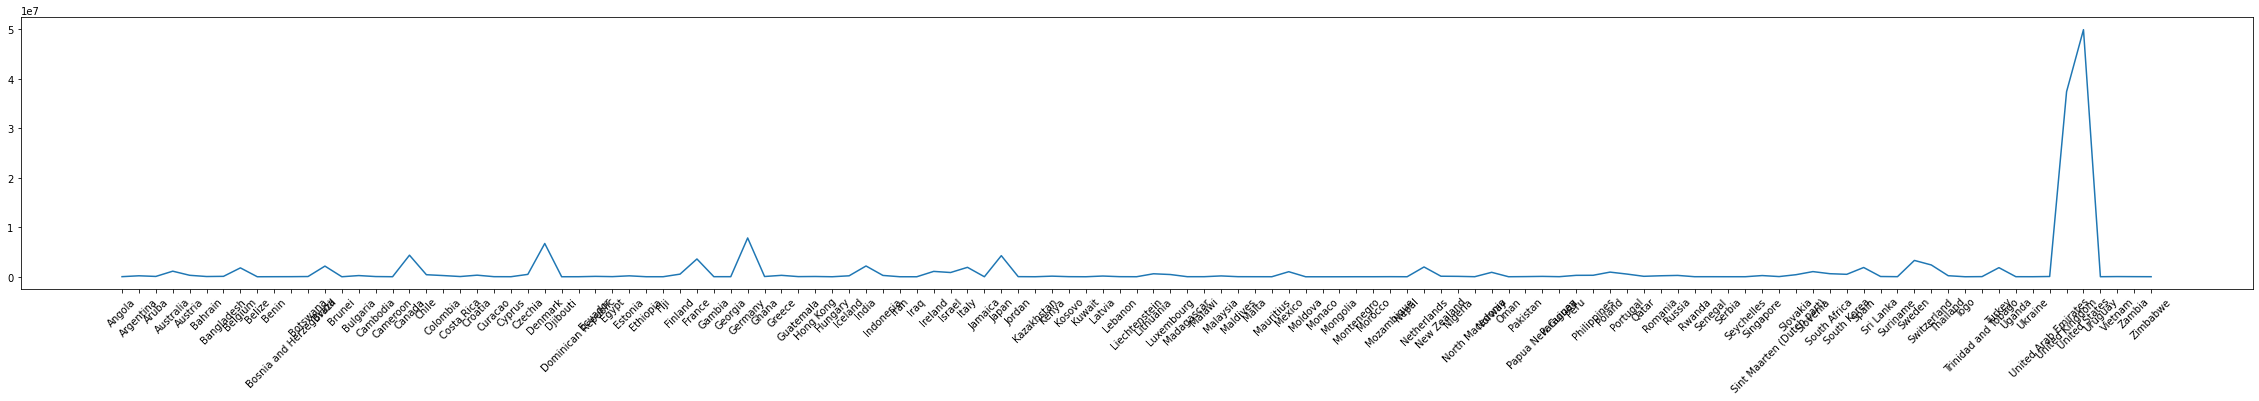

In [7]:
import matplotlib.pyplot as plt
Tnum=df.groupby('location')['num_sequences_total'].sum()

#NTnum=sorted(Tnum,reverse=True)
X=Tnum.keys()
Y=Tnum
plt.figure(figsize=(40,5))
plt.plot(X,Y)
plt.xticks(rotation=45)
plt.show()
#Tnum

In [8]:
country={'City':list(Tnum.keys())}
data = pd.DataFrame(country)
data
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
   
longitude = []
latitude = []
def findGeocode(city):  
  try:
    geolocator = Nominatim(user_agent="your_app_name")
    return geolocator.geocode(city)
  except GeocoderTimedOut:
    return findGeocode(city)
for i in (country["City"]):
  if findGeocode != None:
    loc = findGeocode(i)
    latitude.append(loc.latitude)
    longitude.append(loc.longitude)
  else:
    latitude.append(np.nan)
    longitude.append(np.nan)

In [9]:
country["Longitude"] = longitude
country["Latitude"] = latitude

country["Total numbers"]=Tnum
Ncountry=pd.DataFrame(country)
Ncountry

,City,Longitude,Latitude,Total numbers
location,,,,
Angola,Angola,17.569124,-11.877577,25320
Argentina,Argentina,-64.967282,-34.996496,201864
Aruba,Aruba,-69.960984,12.490300,72000
Australia,Australia,134.755000,-24.776109,1132776
Austria,Austria,14.124560,47.593970,301920
...,...,...,...,...
United States,United States,-100.445882,39.783730,49960248
Uruguay,Uruguay,-56.020153,-32.875555,16368
Vietnam,Vietnam,108.426511,13.290403,43320


In [10]:
t=Ncountry.sort_values(by=['Total numbers'],ascending=True)
t.head()

,City,Longitude,Latitude,Total numbers
location,,,,
Monaco,Monaco,7.424224,43.738449,2016
Mongolia,Mongolia,103.849974,46.825039,3600
Moldova,Moldova,28.567094,47.287961,3648
Iraq,Iraq,44.174977,33.095579,4008
Belize,Belize,-88.760093,16.825979,7536


In [11]:
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(Ncountry)):
  lat = Ncountry.iloc[i]['Latitude']
  long = Ncountry.iloc[i]['Longitude']
  radius=5
  popup_text = """Country : {}<br>
              %of Tnums : {}<br>"""
  popup_text = popup_text.format(Ncountry.iloc[i]['City'],Ncountry.iloc[i]['Total numbers'])
  folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

In [12]:
import numpy as np
from folium.plugins import HeatMap

fmap = folium.Map()
Ncountry["Percetage"]=Ncountry["Total numbers"]/Ncountry["Total numbers"].sum()*1000000
a=Ncountry[["Latitude","Longitude","Percetage"]]
#print(a)
city_list=a.values.tolist()
fmap.add_child(HeatMap(data=city_list,overlay=False,show=False))
fmap

In [13]:
circle_map = folium.Map(location=[30, 15], zoom_start=2, tiles='OpenStreetMap')
for i in range(len(Ncountry)):
  lat = Ncountry.iloc[i]['Latitude']
  long = Ncountry.iloc[i]['Longitude']
  popup_text = """Country : {}<br>
            %of Tnums : {}<br>"""
  popup_text = popup_text.format(Ncountry.iloc[i]['City'],Ncountry.iloc[i]['Total numbers'])
  radius = Ncountry.iloc[i]["Total numbers"]/15
  folium.Circle(location = [lat, long],radius=radius,popup=popup_text,max_width='100',fill=True).add_to(circle_map)
circle_map

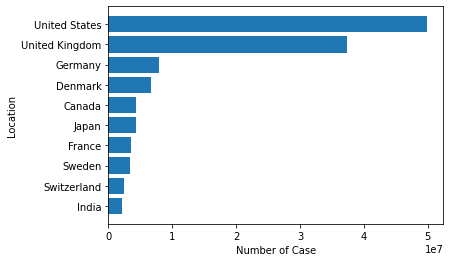

In [14]:
x=t.iloc[-10:,0]
y=t.iloc[-10:,3]
plt.xlabel("Number of Case")
plt.ylabel("Location")
plt.barh(x,y)
plt.show()

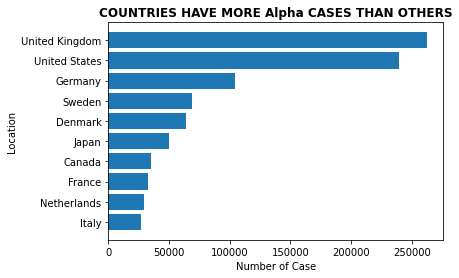

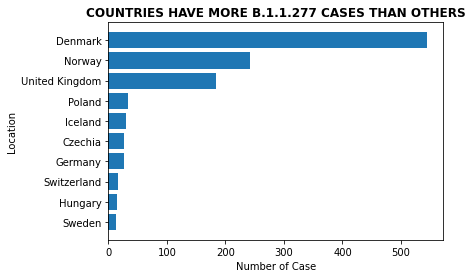

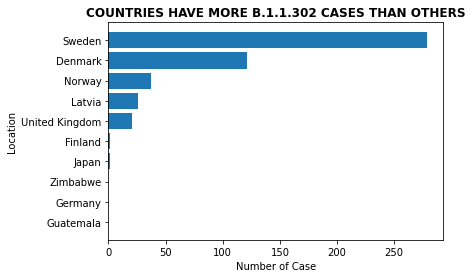

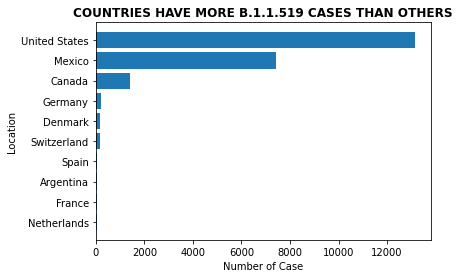

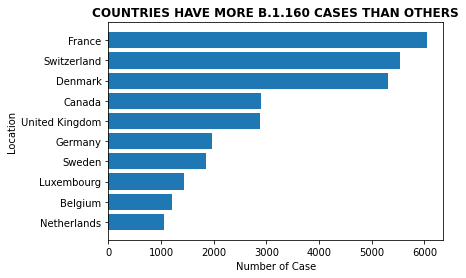

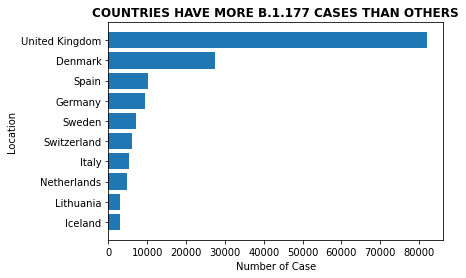

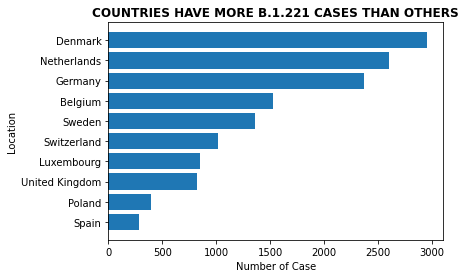

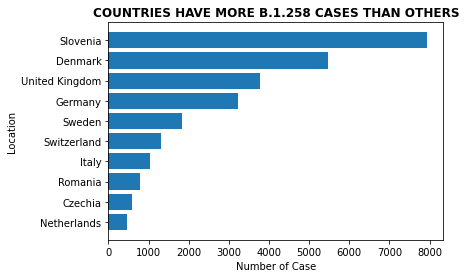

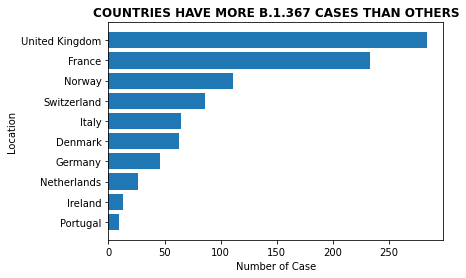

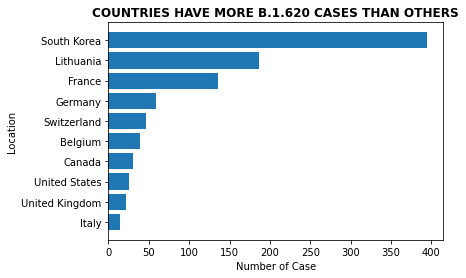

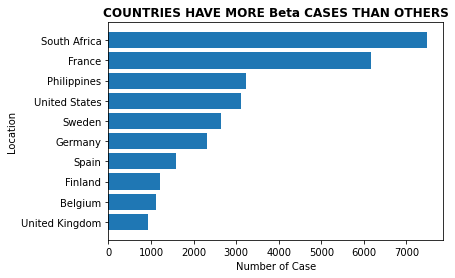

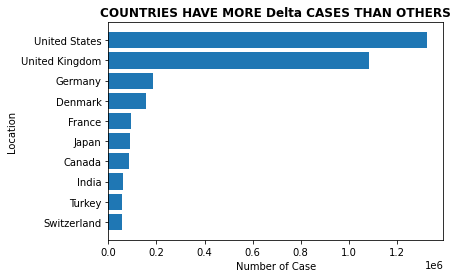

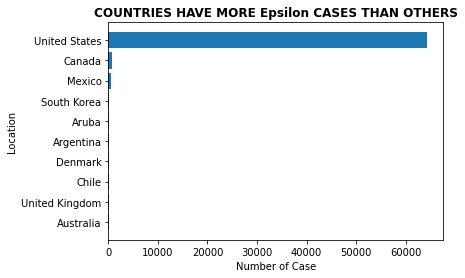

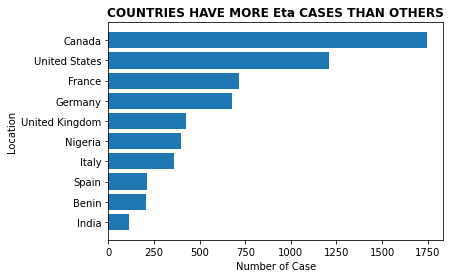

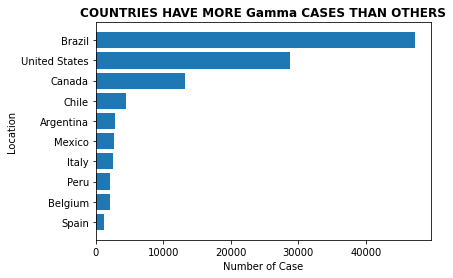

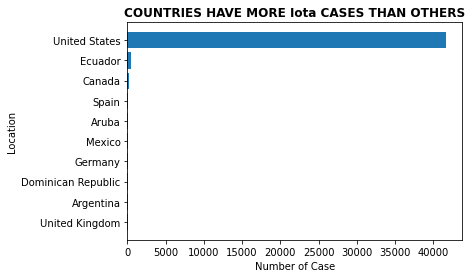

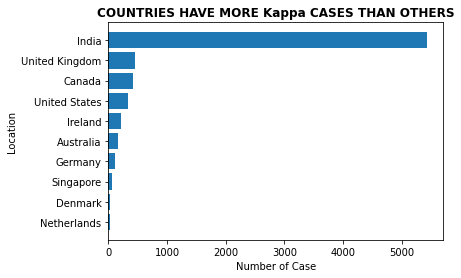

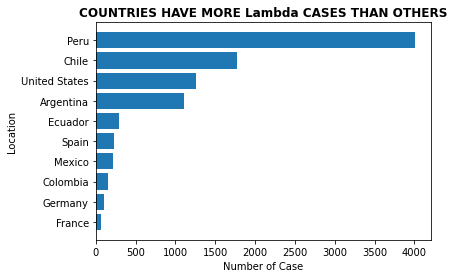

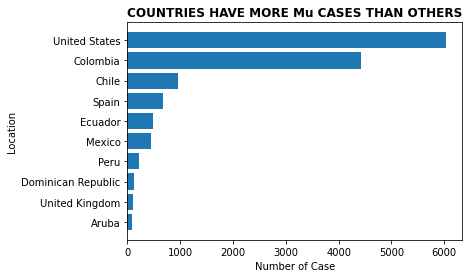

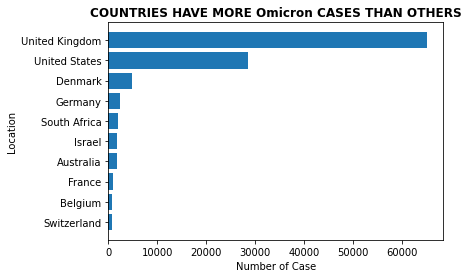

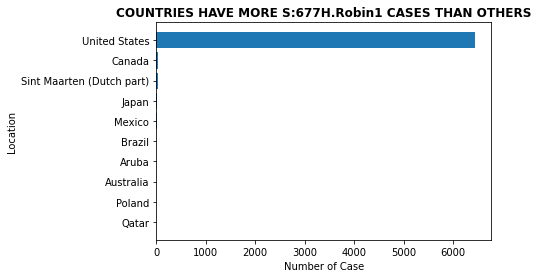

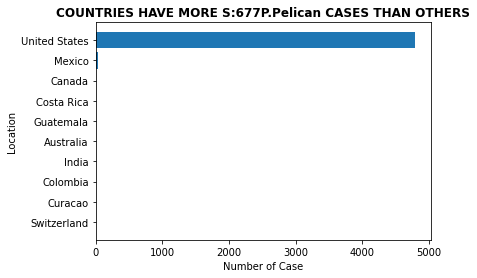

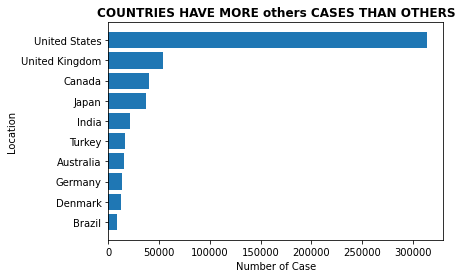

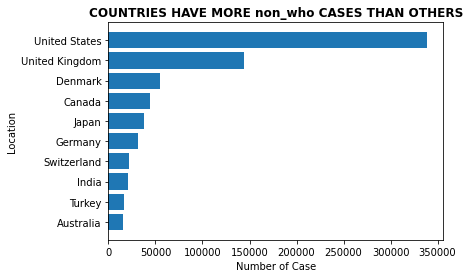

In [15]:
for virus in df.variant.unique():
  df1 = df.loc[df['variant'] == virus].groupby('location')['num_sequences'].agg('sum').sort_values(ascending=True)[-10:]
  #dataframe = pd.DataFrame({'Location':dataframe.index, 'Number of Case':dataframe.values})
  X=df1.keys()
  Y=df1[X]
  plt.barh(X,Y)
  plt.xlabel('Number of Case')
  plt.ylabel('Location')
  plt.title('{} CASES'.format(virus),loc='center',fontweight="bold")
  plt.show()

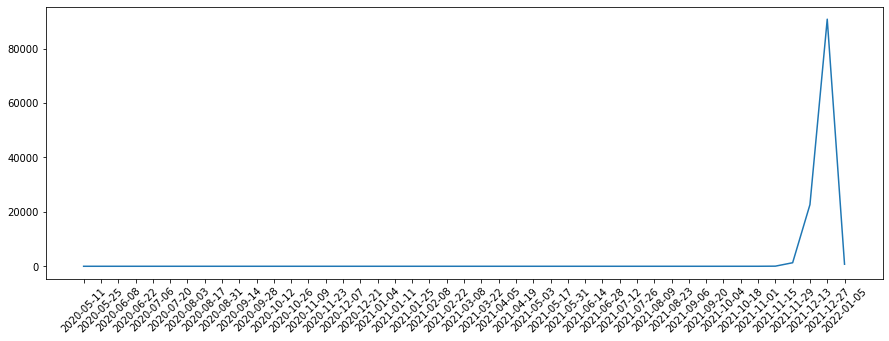

In [16]:
sample = df.loc[df['variant'] == 'Omicron'].groupby('date')['num_sequences'].agg('sum')
xo=sample.keys()
yo=sample[xo]
plt.figure(figsize=(15,5))
plt.plot(xo,yo)
plt.xticks(rotation=45)
plt.show()

In [ ]:
'''import requests
import io
url='https://covid-19.nchc.org.tw/api/covid19?CK=covid-19@nchc.org.tw&querydata=4002'
df=pd.read_csv(url)
for i in df:
  print(i)'''

"import requests\nimport io\nurl='https://covid-19.nchc.org.tw/api/covid19?CK=covid-19@nchc.org.tw&querydata=4002'\ndf=pd.read_csv(url)\nfor i in df:\n  print(i)"

Covid Prediction

In [2]:
import csv
import pandas as pd
import numpy as np
df = pd.read_csv('omicron-covid19/covid-variants.csv')
df.set_index('date', inplace=True)
df

,location,variant,num_sequences,perc_sequences,num_sequences_total
date,,,,,
2020-07-06,Angola,Alpha,0,0.0,3
2020-07-06,Angola,B.1.1.277,0,0.0,3
2020-07-06,Angola,B.1.1.302,0,0.0,3
2020-07-06,Angola,B.1.1.519,0,0.0,3
2020-07-06,Angola,B.1.160,0,0.0,3
...,...,...,...,...,...
2021-11-01,Zimbabwe,Omicron,0,0.0,6
2021-11-01,Zimbabwe,S:677H.Robin1,0,0.0,6
2021-11-01,Zimbabwe,S:677P.Pelican,0,0.0,6


In [7]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout
from keras.callbacks import EarlyStopping
from keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt

class COVID19_Forecasts:
  def __init__(self,length=80,batch_size=1):
    self.length = length
    self.batch_size = batch_size
    
  def model(self,length,batch_size,s_train,s_test):
    model = Sequential()
    model.add(LSTM(100, input_shape=(length,s_train.shape[1])))
    #model.add(LSTM(256, return_sequences=True))
    #model.add(TimeDistributed(Dense(1)))
    #model.add(Flatten())
    #model.add(Dense(5,activation='linear'))
    model.add(Dense(s_train.shape[1]))
    #model.compile(loss="mean_absolute_error", optimizer="adam",metrics=['mean_absolute_error'])
    model.compile(optimizer='rmsprop', loss='mean_squared_error')
    model.summary()
    early_stop = EarlyStopping(monitor='val_loss',patience=25)
    train_data_gen = TimeseriesGenerator(s_train, s_train, length=length, batch_size=batch_size, sampling_rate=1,stride=1) 
    test_data_gen = TimeseriesGenerator(s_test, s_test, length=length, batch_size=batch_size, sampling_rate=1,stride=1)
    history=model.fit(train_data_gen,epochs=100,validation_data=test_data_gen,callbacks=[early_stop]).history
    
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.show()
    return model,train_data_gen,test_data_gen

  def data_preb(self,data,index_size):
    data.sort_index(ascending=True,inplace=True)
    train = data.iloc[:index_size]
    test = data.iloc[index_size:]
    scaler = MinMaxScaler()
    scaler.fit(train)
    s_train = scaler.transform(train)
    s_test = scaler.transform(test)
    return scaler,s_train,s_test,train,test

In [4]:
covid = COVID19_Forecasts()

In [26]:
df['Time']=df.index
data=pd.DataFrame(df.groupby('Time')['num_sequences_total'].sum())
#data=data.drop(['location','variant','perc_sequences','num_sequences'],axis=1,inplace=True)
scaler,s_train,s_test,train,test = covid.data_preb(data,40)

array([[ 394464],
       [ 309672],
       [ 231840],
       [ 387840],
       [ 378336],
       [ 442104],
       [ 468840],
       [ 443304],
       [ 424152],
       [ 435696],
       [ 555192],
       [ 651192],
       [ 850944],
       [1108848],
       [1147392],
       [1017840],
       [1694856],
       [1711776],
       [1254024],
       [2793552],
       [2969184],
       [3202200],
       [3616392],
       [4492440],
       [4793784],
       [4923672],
       [4734096],
       [4056264],
       [3252192],
       [2954496],
       [2914464],
       [4049400],
       [5837184],
       [8268000],
       [8992080],
       [8718744],
       [7856088],
       [6733368],
       [6668256],
       [7258656],
       [8010672],
       [7953192],
       [8447184],
       [4158864],
       [  23496]])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


36/36 [==============================] - 3s 19ms/step - loss: 0.0499 - val_loss: 0.5658
Epoch 2/100
36/36 [==============================] - 0s 6ms/step - loss: 0.0309 - val_loss: 0.6460
Epoch 3/100
36/36 [==============================] - 0s 6ms/step - loss: 0.0310 - val_loss: 0.7846
Epoch 4/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0278 - val_loss: 0.8537
Epoch 5/100
36/36 [==============================] - 0s 6ms/step - loss: 0.0263 - val_loss: 0.7076
Epoch 6/100
36/36 [==============================] - 0s 6ms/step - loss: 0.0260 - val_loss: 0.6194
Epoch 7/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0233 - val_loss: 0.6431
Epoch 8/100
36/36 [==============================] - 0s 6ms/step - loss: 0.0245 - val_loss: 0.5552
Epoch 9/100
36/36 [==============================] - 0s 6ms/step - loss: 0.0237 - val_loss: 0.5084
Epoch 10/100
36/36 [==============================] - 0s 6ms/step - loss: 0.0213 - val_loss: 0.8794
Epoch 11/100
36/36 [

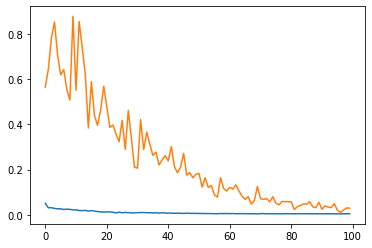

In [8]:
model,train_data_gen,test_data_gen = covid.model(length=4,batch_size=1,s_train=s_train,s_test=s_test)

In [28]:
score = model.evaluate(test_data_gen) 
trainPredict = model.predict(train_data_gen) 
testPredict = model.predict(test_data_gen)
print(score)

1/1 [==============================] - 0s 66ms/step - loss: 0.0286


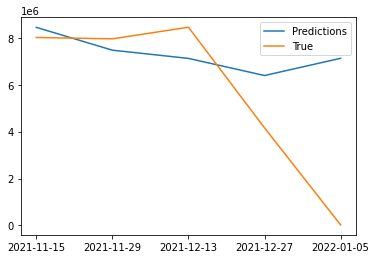

In [29]:
pred= scaler.inverse_transform(trainPredict)
Y=data.index
plt.plot(Y[-5:],pred[-5:],label="Predictions")
plt.plot(Y[-5:],data.values[-5:],label="True")
plt.legend()
plt.show()

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

myseed = 42069
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(myseed)
torch.manual_seed(myseed)
if torch.cuda.is_available():
  torch.cuda.manual_seed_all(myseed)

In [ ]:
df2=df[df['variant']=='Omicron']
covid_train=df2.drop(columns=['variant'])
conid_test=covid_train.drop(columns=['num_sequences_total'])
covid_train.to_csv("covid_train.csv")
conid_test.to_csv("conid_test.csv")
tr_path = 'covid_train.csv'
tt_path = 'conid_test.csv'

In [ ]:
def get_device():
  return 'cuda' if torch.cuda.is_available() else 'cpu'
def plot_learning_curve(loss_record, title=''):
  total_steps = len(loss_record['train'])
  x_1 = range(total_steps)
  x_2 = x_1[::len(loss_record['train']) // len(loss_record['dev'])]
  figure(figsize=(6, 4))
  plt.plot(x_1, loss_record['train'], c='tab:red', label='train')
  plt.plot(x_2, loss_record['dev'], c='tab:cyan', label='dev')
  plt.ylim(0.0, 5.)
  plt.xlabel('Training steps')
  plt.ylabel('MSE loss')
  plt.title('Learning curve of {}'.format(title))
  plt.legend()
  plt.show()

def plot_pred(dv_set, model, device, lim=35., preds=None, targets=None):
  if preds is None or targets is None:
    model.eval()
    preds, targets = [], []
    for x, y in dv_set:
      x, y = x.to(device), y.to(device)
      with torch.no_grad():
        pred = model(x)
        preds.append(pred.detach().cpu())
        targets.append(y.detach().cpu())
    preds = torch.cat(preds, dim=0).numpy()
    targets = torch.cat(targets, dim=0).numpy()

  figure(figsize=(5, 5))
  plt.scatter(targets, preds, c='r', alpha=0.5)
  plt.plot([-0.2, lim], [-0.2, lim], c='b')
  plt.xlim(-0.2, lim)
  plt.ylim(-0.2, lim)
  plt.xlabel('ground truth value')
  plt.ylabel('predicted value')
  plt.title('Ground Truth v.s. Prediction')
  plt.show()

In [ ]:
class COVID19Dataset(Dataset):
  def __init__(self,path,mode='train',target_only=False):
    self.mode = mode
    with open(path, 'r') as fp:
      data = list(csv.reader(fp))
      data = np.array(data[1:])[:, 3:].astype(float)
    if not target_only:
      feats = list(range(2))
    else:
      pass
    if mode == 'test':
      data = data[:, feats]
      self.data = torch.FloatTensor(data)
    else:
      target = data[:, -1]
      data = data[:, feats]
      if mode == 'train':
        indices = [i for i in range(len(data)) if i % 10 != 0]
      elif mode == 'dev':
        indices = [i for i in range(len(data)) if i % 10 == 0]
      self.data = torch.FloatTensor(data[indices])
      self.target = torch.FloatTensor(target[indices])
    self.data[:, 3:] = (self.data[:, 3:] - self.data[:, 3:].mean(dim=0, keepdim=True))/ self.data[:, 3:].std(dim=0, keepdim=True)

    self.dim = self.data.shape[1]

    print('Finished reading the {} set of COVID19 Dataset ({} samples found, each dim = {})'
          .format(mode, len(self.data), self.dim))

  def __getitem__(self, index):
    if self.mode in ['train', 'dev']:
      return self.data[index], self.target[index]
    else:
      return self.data[index]

  def __len__(self):
    return len(self.data)

In [ ]:
def prep_dataloader(path, mode, batch_size, n_jobs=0, target_only=False):
  dataset = COVID19Dataset(path, mode=mode, target_only=target_only)  # Construct dataset
  dataloader = DataLoader(
      dataset, batch_size,
      shuffle=(mode == 'train'), drop_last=False,
      num_workers=n_jobs, pin_memory=True)                            # Construct dataloader
  return dataloader

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self, input_dim):
    super(NeuralNet, self).__init__()
    self.net = nn.Sequential(
      nn.Linear(input_dim, 64),
      nn.ReLU(),
      nn.Linear(64, 1)
    )
    self.criterion = nn.MSELoss(reduction='mean')
  def forward(self, x):
    return self.net(x).squeeze(1)
  def cal_loss(self, pred, target):
    ''' Calculate loss '''
    # TODO: you may implement L1/L2 regularization here
    return self.criterion(pred, target)

In [ ]:
def train(tr_set, dv_set, model, config, device):
  n_epochs = config['n_epochs']
  optimizer = getattr(torch.optim, config['optimizer'])(model.parameters(), **config['optim_hparas'])

  min_mse = 500.
  loss_record = {'train': [], 'dev': []}
  early_stop_cnt = 0
  epoch = 0
  while epoch < n_epochs:
    model.train()
    for x, y in tr_set:
      optimizer.zero_grad()
      x, y = x.to(device), y.to(device)
      pred = model(x)
      mse_loss = model.cal_loss(pred, y)
      mse_loss.backward()
      optimizer.step()
      loss_record['train'].append(mse_loss.detach().cpu().item())
    dev_mse = dev(dv_set, model, device)
    if dev_mse < min_mse:
      min_mse = dev_mse
      print('Saving model (epoch = {:4d}, loss = {:.4f})'
          .format(epoch + 1, min_mse))
      torch.save(model.state_dict(), config['save_path'])  # Save model to specified path
      early_stop_cnt = 0
    else:
      early_stop_cnt += 1
    epoch += 1
    loss_record['dev'].append(dev_mse)
    if early_stop_cnt > config['early_stop']:
      break
  print('Finished training after {} epochs'.format(epoch))
  return min_mse, loss_record

In [ ]:
def dev(dv_set, model, device):
  model.eval()
  total_loss = 0
  for x, y in dv_set:
    x, y = x.to(device), y.to(device)
    with torch.no_grad():
      pred = model(x)
      mse_loss = model.cal_loss(pred, y)
    total_loss += mse_loss.detach().cpu().item() * len(x)
  total_loss = total_loss / len(dv_set.dataset)

  return total_loss

In [ ]:
def test(tt_set, model, device):
  model.eval()
  preds = []
  for x in tt_set:
    x = x.to(device)
    with torch.no_grad():
      pred = model(x)
      preds.append(pred.detach().cpu())
  preds = torch.cat(preds, dim=0).numpy()
  return preds

In [ ]:
device = get_device()
os.makedirs('models', exist_ok=True)
target_only = False

config = {
    'n_epochs': 3000,
    'batch_size': 270,
    'optimizer': 'SGD',
    'optim_hparas': {
        'lr': 0.001,
        'momentum': 0.9
    },
    'early_stop': 25,
    'save_path': 'models/model.pth'
}

In [ ]:
tr_set = prep_dataloader(tr_path, 'train', config['batch_size'], target_only=target_only)
dv_set = prep_dataloader(tr_path, 'dev', config['batch_size'], target_only=target_only)
tt_set = prep_dataloader(tt_path, 'test', config['batch_size'], target_only=target_only)

Finished reading the train set of COVID19 Dataset (3765 samples found, each dim = 2)
Finished reading the dev set of COVID19 Dataset (419 samples found, each dim = 2)
Finished reading the test set of COVID19 Dataset (4184 samples found, each dim = 2)


In [ ]:
model = NeuralNet(tr_set.dataset.dim).to(device)

In [ ]:
model_loss, model_loss_record = train(tr_set, dv_set, model, config, device)

Finished training after 201 epochs


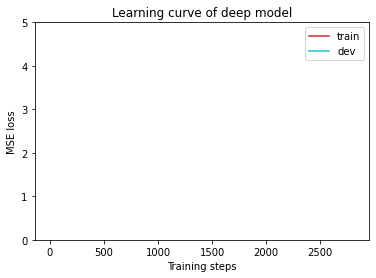

In [ ]:
plot_learning_curve(model_loss_record, title='deep model')

In [ ]:
del model
model = NeuralNet(tr_set.dataset.dim).to(device)
ckpt = torch.load(config['save_path'], map_location='cpu')
model.load_state_dict(ckpt)
plot_pred(dv_set, model, device)

FileNotFoundError: ignored

In [ ]:
def save_pred(preds, file):
  print('Saving results to {}'.format(file))
  with open(file, 'w') as fp:
    writer = csv.writer(fp)
    writer.writerow(['id', 'tested_positive'])
    for i, p in enumerate(preds):
      writer.writerow([i, p])

preds = test(tt_set, model, device)
save_pred(preds, 'pred.csv')

RuntimeError: ignored